In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import cv2
import os, glob
import numpy as np
from moviepy.editor import VideoFileClip
cwd = os.getcwd()
from pathlib import Path
from typing import List
import pickle
import math

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Capture frames from the video for training and testing purpose

In [2]:
VIDEO_PATH = Path('last1.mp4')
FRAME_FOLDER_PATH = Path('frames')

def capture_frames(
    num_captures: int = 10,
    frame_frequency: int = 50,
    video_path=VIDEO_PATH,
    frame_folder_path=FRAME_FOLDER_PATH,
):
    """Capture frames from the given video at a given frame frequency.

    Captured frames will be stored in the folder specified by `frame_folder_path`. Each image
    is labeled as {index}.png

    :param frame_frequency: The frequency at which frames are captured as image.
    :param video_path: A Path object to the video.
    :param frame_folder_path: A Path object to the folder where the captured frames will be stored.
    """
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened():
        exit(0)
    total_frame = 0
    idx = 0
    while idx < num_captures:
        ret, frame = cap.read()
        if ret is False:
            break
        total_frame += 1
        if total_frame % frame_frequency == 0:
            image_path = frame_folder_path.joinpath(f'{idx:02}.png')
            cv2.imwrite(str(image_path), frame)
            print(image_path)
            idx += 1
    cap.release()


def show_images(images, number_of_images, cmap=None, fig_size_base=(20, 10), file_name=''):
    """Show images in a column.

    :param images: A numpy array of images. Each image must be converted to an array already.
    :param number_of_images: number of images to show. All images will be shown in a column.
    :param cmap: Color map. If the image is grey scale, pass 'grey', otherwise leave as None.
    :param fig_size_base: The base scale of figure size. Each figure is considered to be 20
        in width and 10 in height.
    """
    if number_of_images > 1:
        fig, axes = plt.subplots(
            number_of_images,
            1,
            figsize=(fig_size_base[0], number_of_images * fig_size_base[1]),
        )
        for image, ax in zip(images, axes.flatten()):
            
            ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap=cmap)
            ax.set_axis_off()
    else:
        fig, ax = plt.subplots(1, 1, figsize=(30, 30))
        ax.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB), cmap=cmap)
        ax.set_axis_off()
    plt.tight_layout()
    if file_name:
        plt.savefig(file_name)
    else:
        plt.show()


In [3]:
capture_frames()

frames\00.png
frames\01.png
frames\02.png
frames\03.png
frames\04.png
frames\05.png
frames\06.png
frames\07.png
frames\08.png
frames\09.png


# Use cv2 to read images. All images shall be read via cv2.

In [4]:
all_image_paths = sorted(FRAME_FOLDER_PATH.glob('*.png'))

all_images = np.array([
    [cv2.imread(str(p)), i] for i, p in enumerate(all_image_paths)
])

Images shown are indices: [0 9]


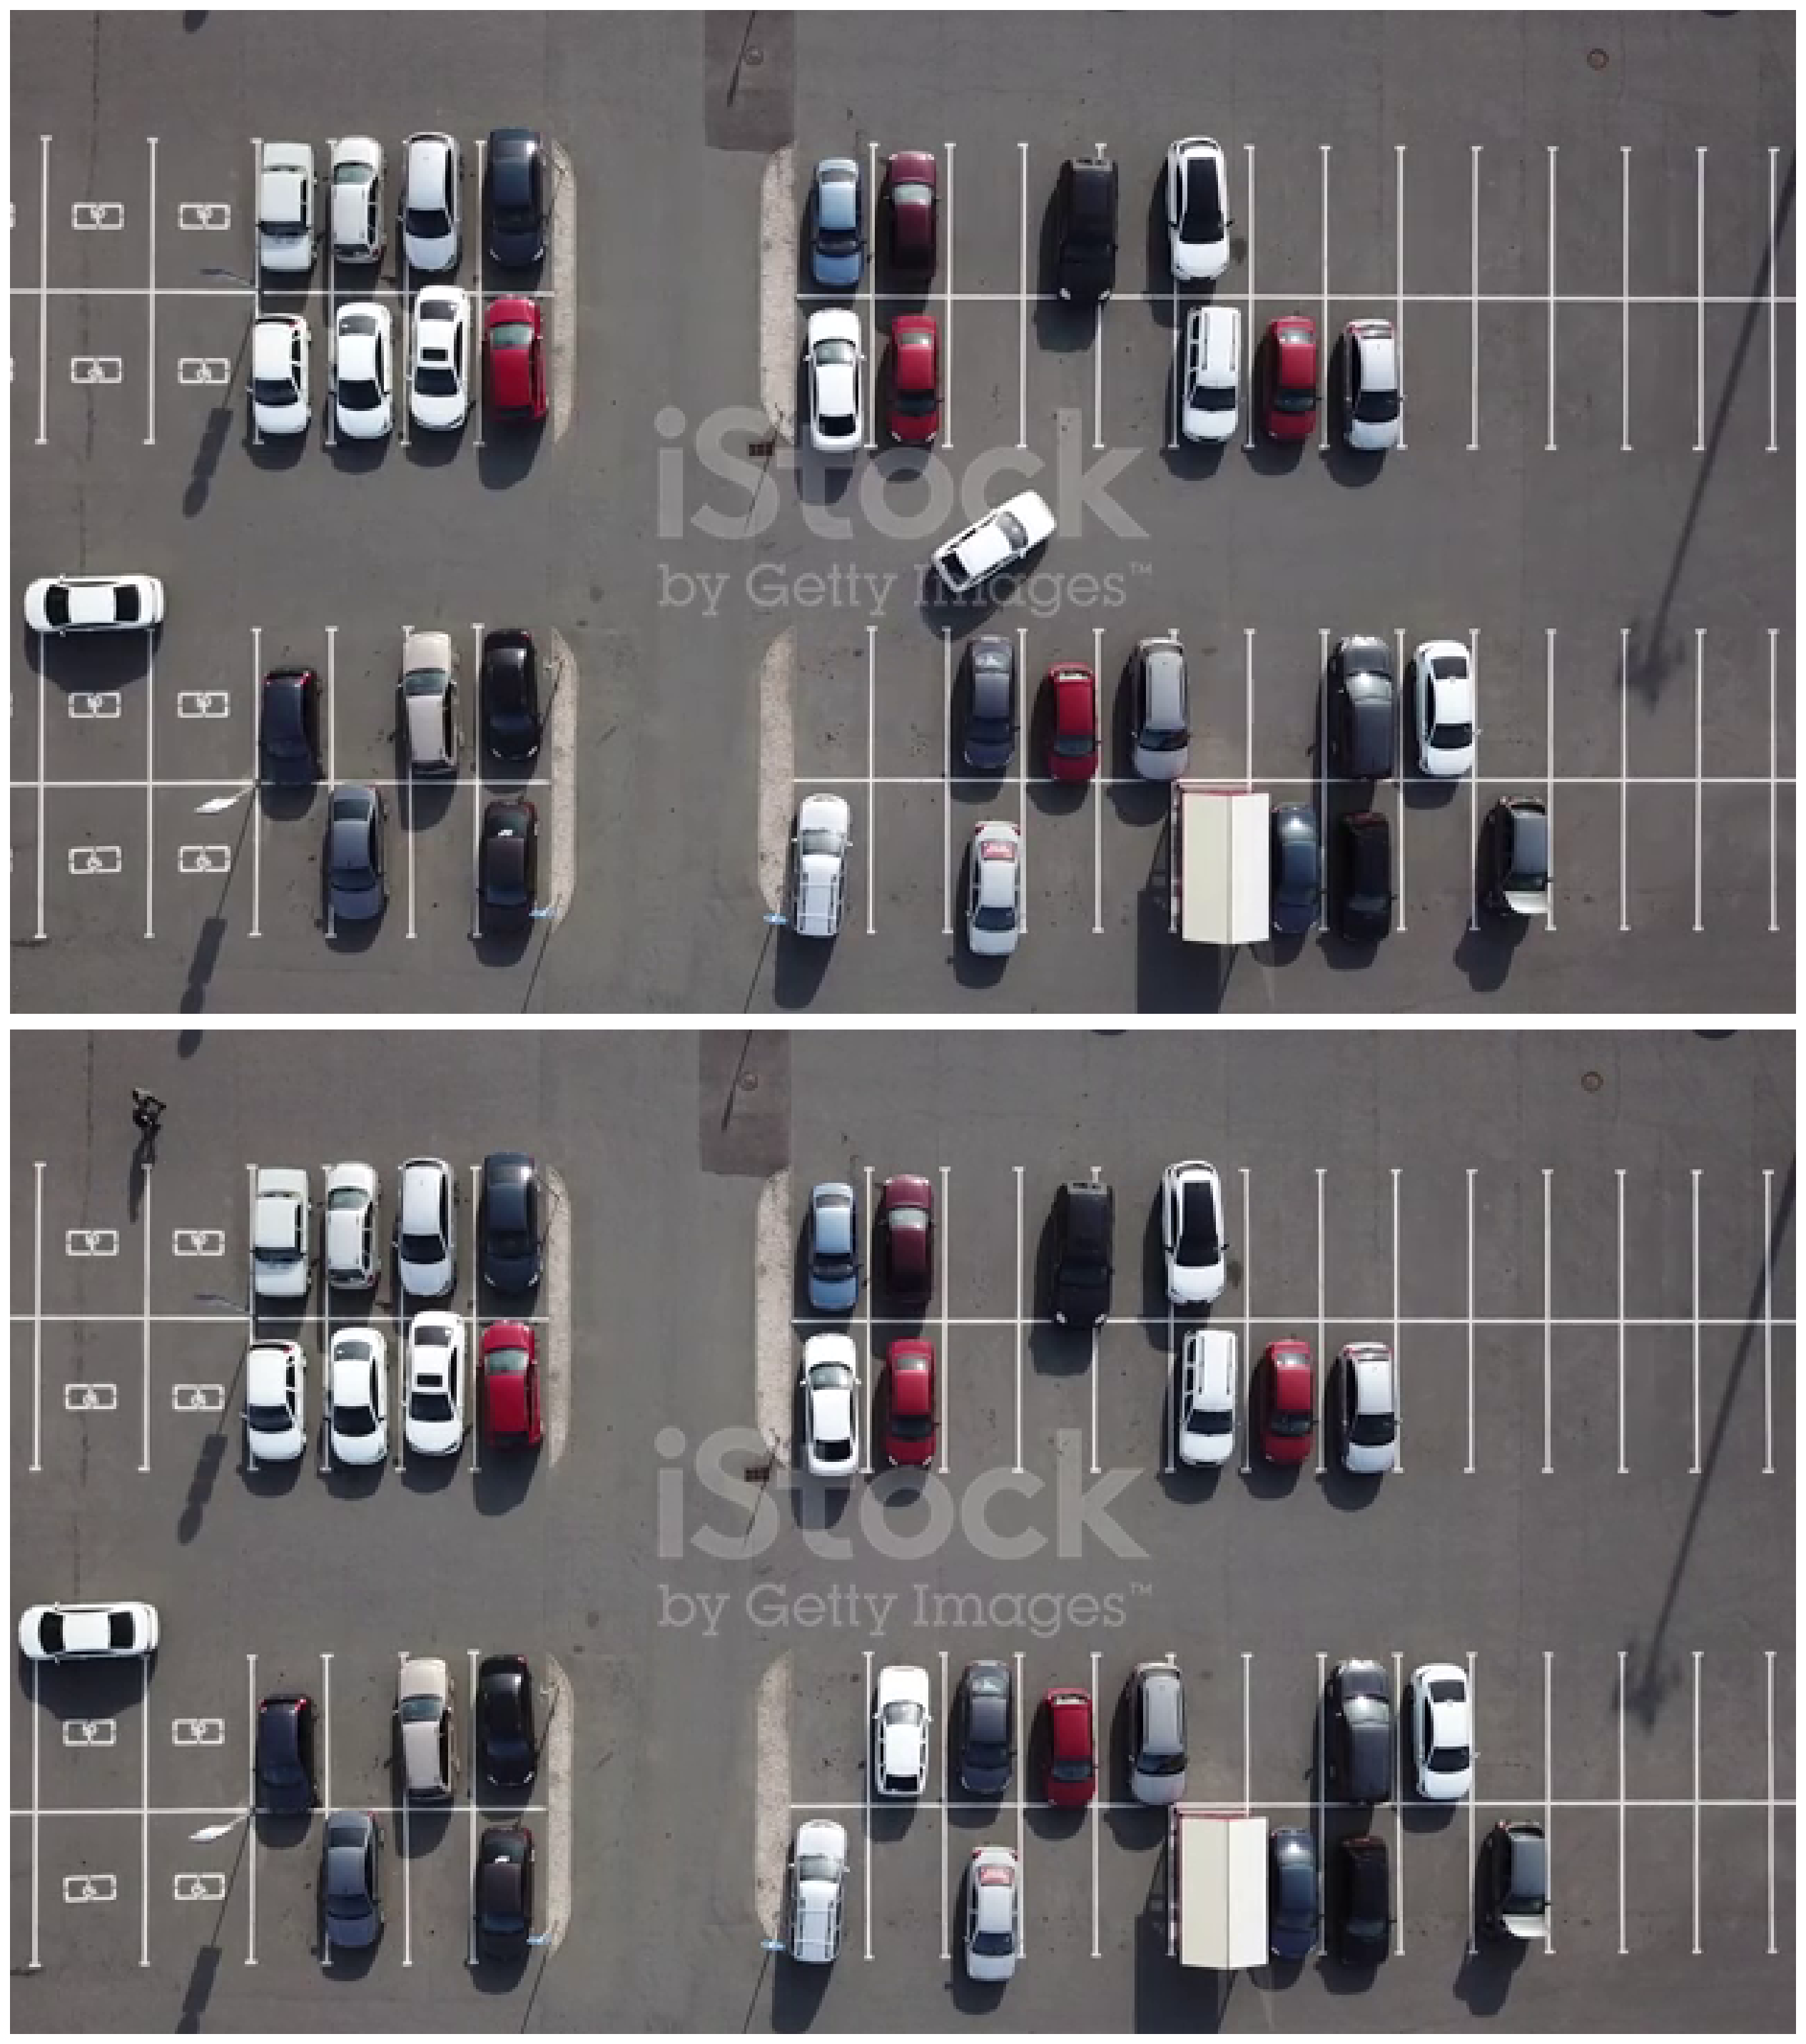

In [5]:
IMAGE_INDICES = np.array([0,9])
images = all_images[IMAGE_INDICES, 0]
show_images(images, images.shape[0], file_name='original.png')
print(f'Images shown are indices: {all_images[IMAGE_INDICES, 1]}')

# gray scaled version

In [6]:
def select_color_then_gray_scale(image, color_bgr: List, plusminus: int = 40): 
    
    color = np.uint8(color_bgr)
    mask = cv2.inRange(image, color - plusminus, color + plusminus)
    return cv2.cvtColor(
        cv2.bitwise_and(image, image, mask=mask),
        cv2.COLOR_BGR2GRAY,
    )

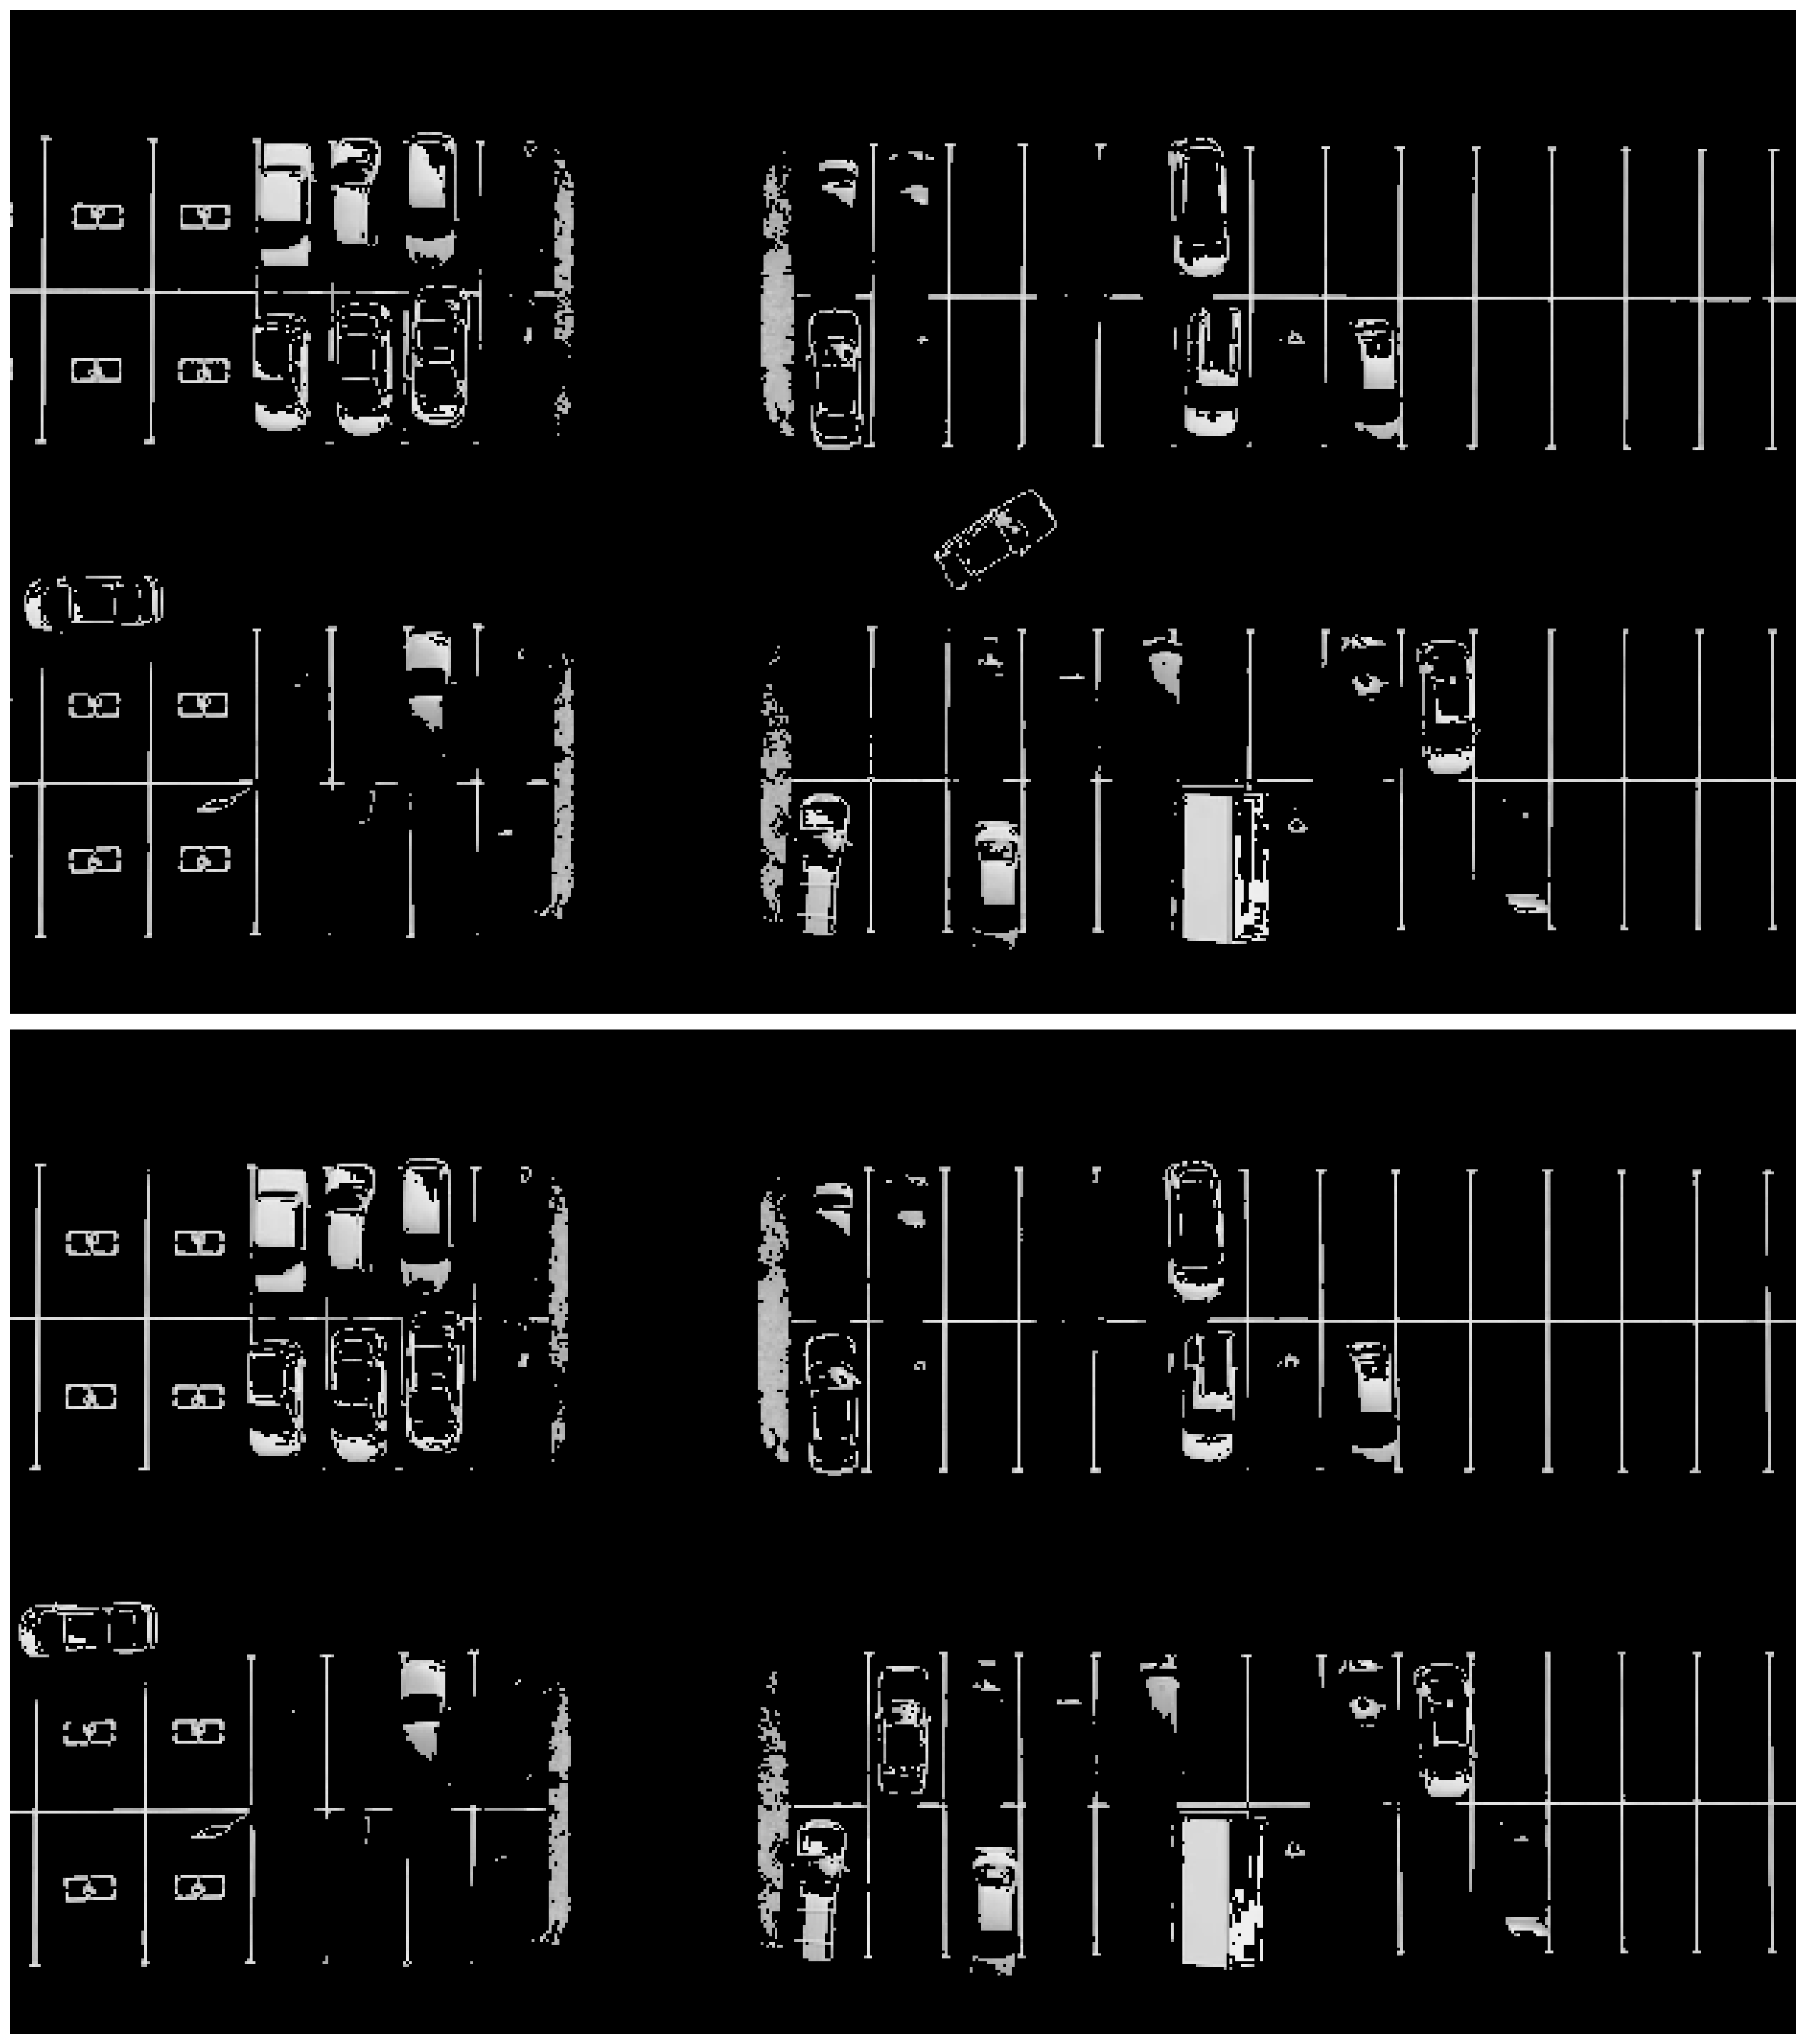

In [7]:
white_bgr = [200, 200, 200]
whites = np.array([select_color_then_gray_scale(img, white_bgr) for img in images])
show_images(whites, whites.shape[0], file_name='imageswhite_selected.png')

# Detect edges in a gray scaled image

In [8]:

def detect_edges(image, h_low: int, h_high: int):
   
    return cv2.Canny(image, h_low, h_high)

def detect_edges(image, h_low: int, h_high: int):
  
    return cv2.Canny(image, h_low, h_high)


def blackout(image, vertices):
   
    mask = np.zeros_like(image)
    if len(mask.shape) == 2:
        cv2.fillPoly(mask, vertices, 255)
    else:
        cv2.fillPoly(mask, vertices, (255,) * mask.shape[2])
    return cv2.bitwise_and(image, mask)


def focus(image, percent_vertices):
   
    r, c = image.shape[:2]
    # Manuall create the vertices from percent_vertices
    vertices = np.array(
        [[[int(c * cp), int(r * rp)] for rp, cp in percent_vertices]],
        dtype=np.int32,
    )
    return blackout(image, vertices)

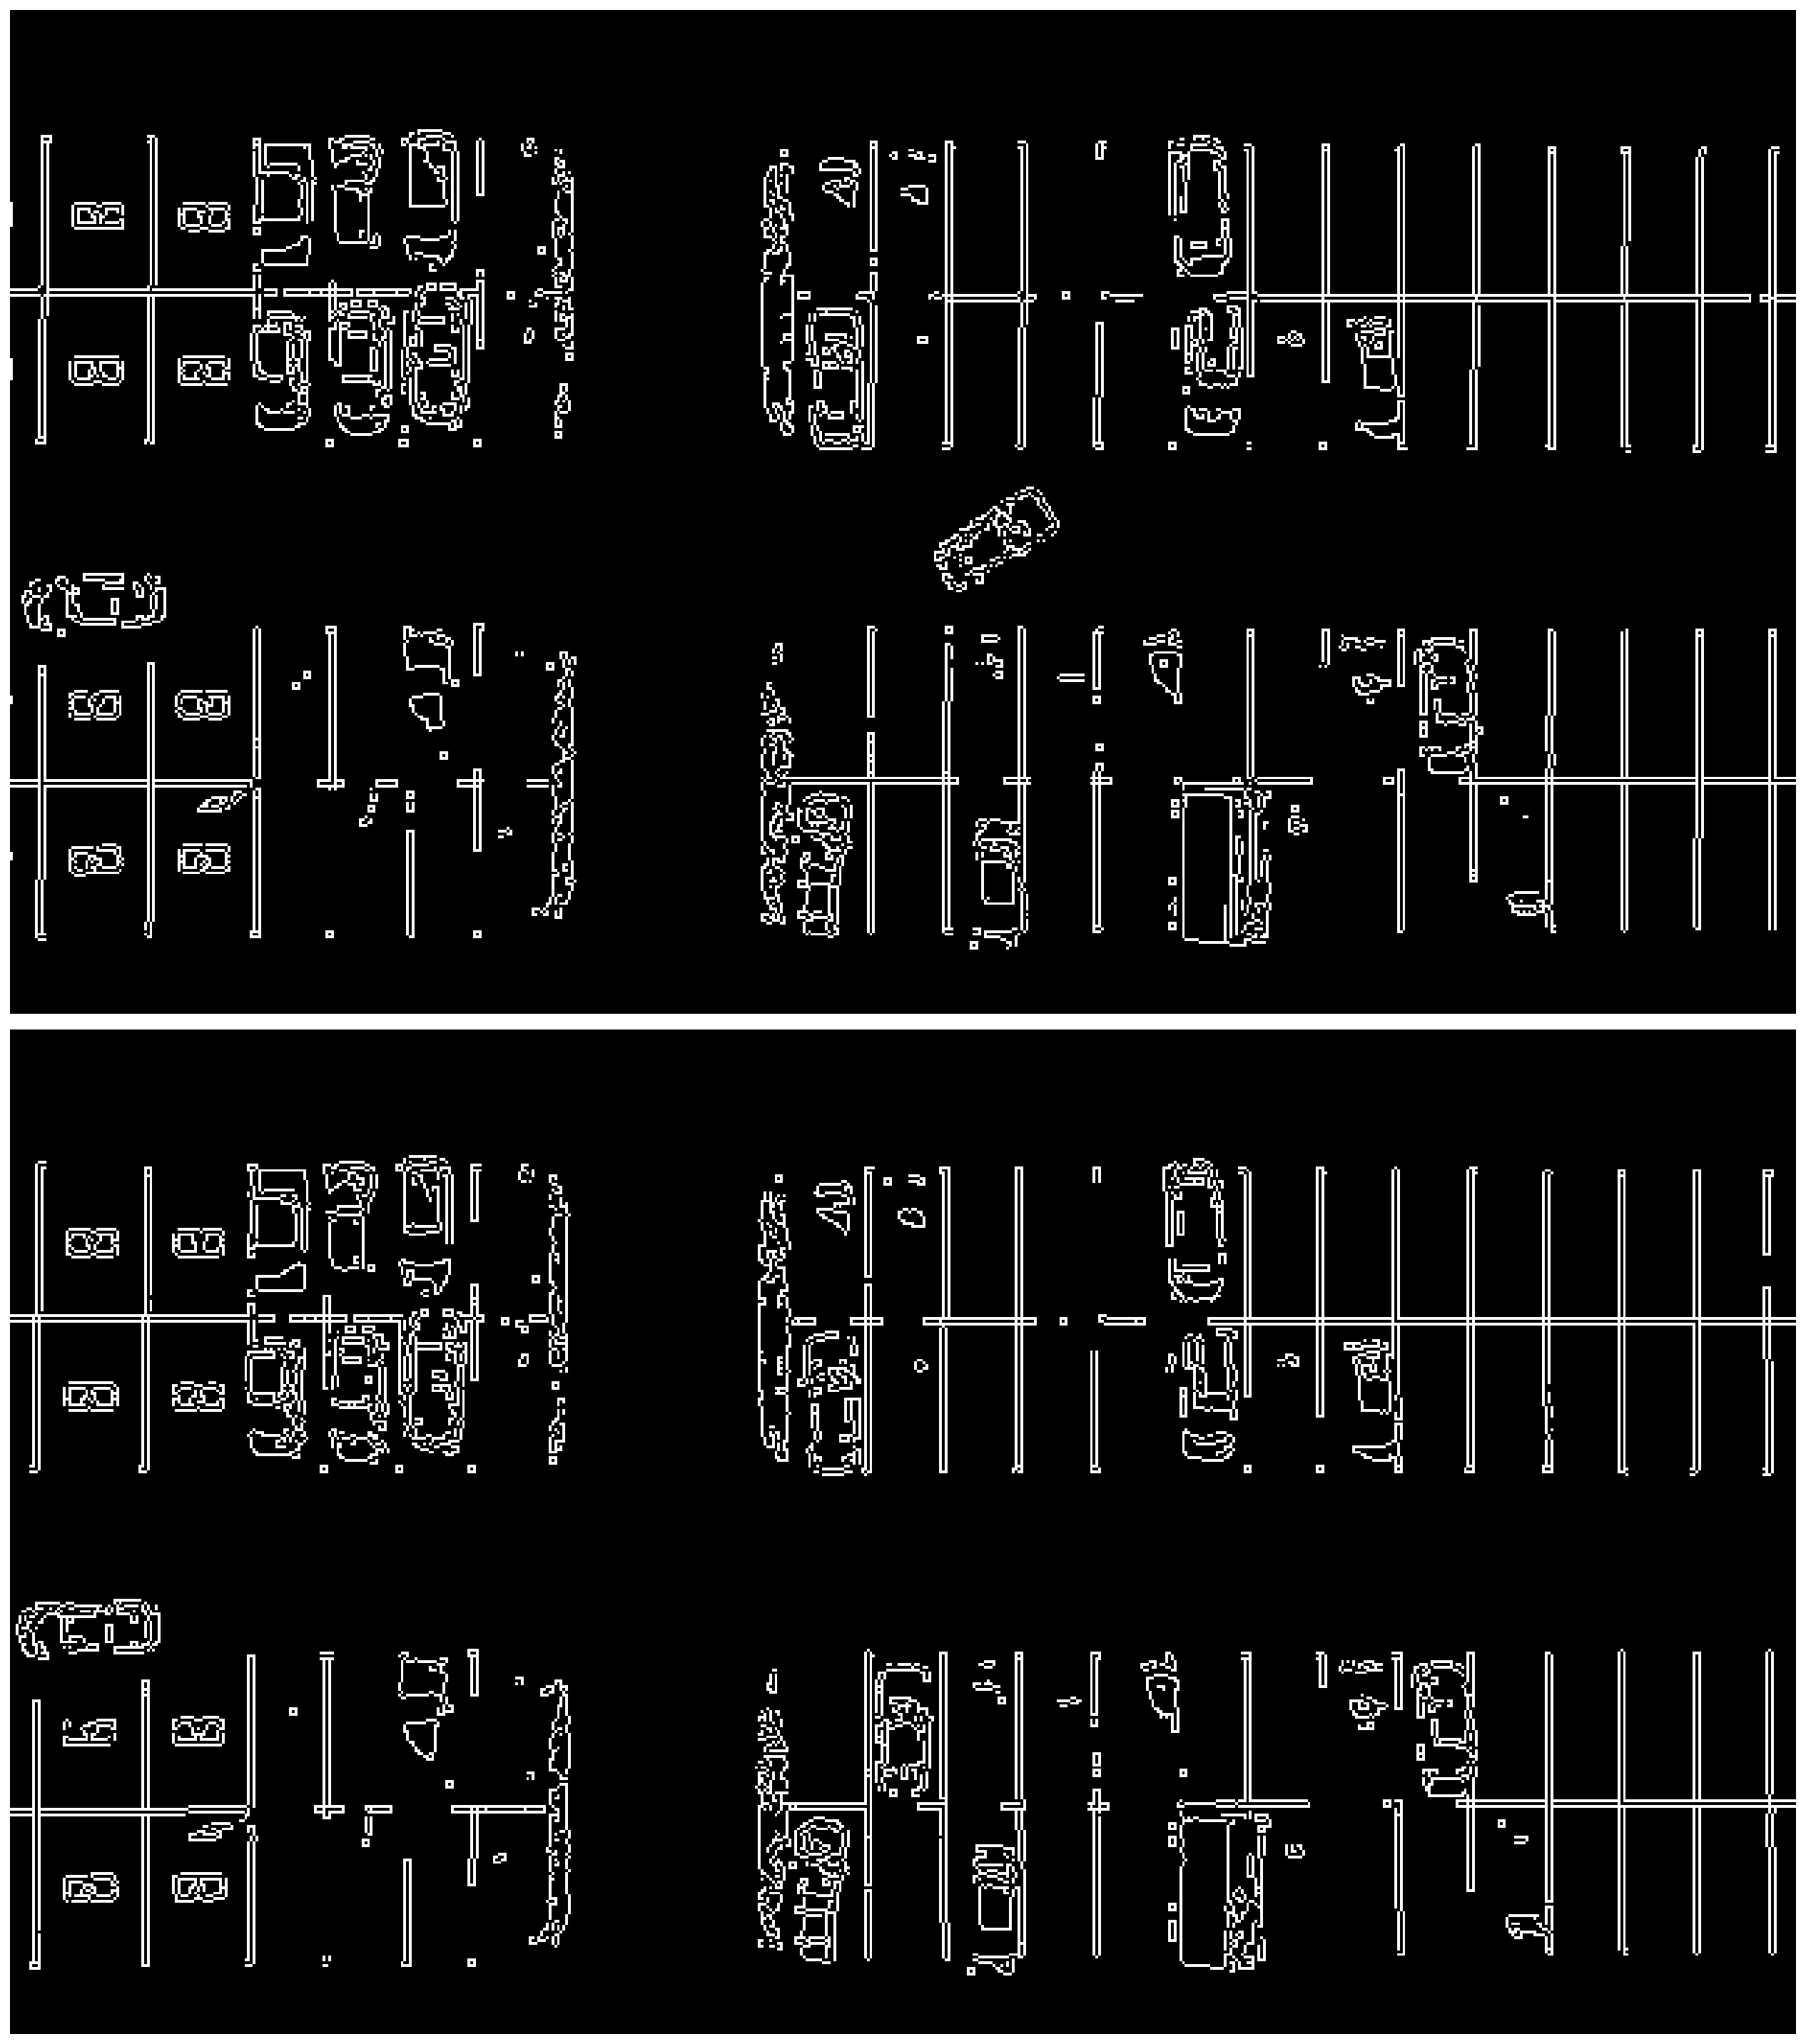

In [9]:
white_edges = np.array([detect_edges(img, 60, 150) for img in whites])
show_images(white_edges, white_edges.shape[0], file_name='imagesedge_detection.png')

# Draw Bounding Box

In [10]:
import cv2
import pickle

width, height = 38, 60
'''
try:
    with open('CarPa', 'rb') as f:
        posList = pickle.load(f)
        
except:
'''
posList = []


def mouseClick(events, x, y, flags, params):
    if events == cv2.EVENT_LBUTTONDOWN:
        posList.append((x, y))
    if events == cv2.EVENT_RBUTTONDOWN:
        for i, pos in enumerate(posList):
            x1, y1 = pos
            if x1 < x < x1 + width and y1 < y < y1 + height:
                posList.pop(i)

    with open('CarPa', 'wb') as f:
        pickle.dump(posList, f)


while True:
    img = cv2.imread('frames/00.png')
    for pos in posList:
        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), (255, 0, 255), 1)

    cv2.imshow("Image", img)
    cv2.setMouseCallback("Image", mouseClick)
    cv2.waitKey(1)
    cv2.imwrite('savedIm.png', img)


KeyboardInterrupt: 

In [ ]:
import cv2
import pickle

width, height = 25, 55

try:
    with open('CarPa', 'rb') as f:
        posList = pickle.load(f)
        print(posList)
except:
        posList = []


def mouseClick(events, x, y, flags, params):
    if events == cv2.EVENT_LBUTTONDOWN:
        posList.append((x, y))
    if events == cv2.EVENT_RBUTTONDOWN:
        for i, pos in enumerate(posList):
            x1, y1 = pos
            if x1 < x < x1 + width and y1 < y < y1 + height:
                posList.pop(i)

    with open('CarPa'+'.png', 'wb') as f:
        pickle.dump(posList, f)


while True:
    img = cv2.imread('frames/00.png')
    for pos in posList:
        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), (255, 0, 255), 2)

    cv2.imshow("Image", img)
    cv2.setMouseCallback("Image", mouseClick)
    cv2.waitKey(1)
    cv2.imwrite('savedImage.png', img)


In [ ]:
posList

In [22]:
len(posList)

69

In [ ]:
[(307, 218), (277, 218), (335, 217), (362, 219), (389, 218), (419, 219), (444, 219), (470, 220), (500, 221), (528, 221), (550, 220), (577, 220), (606, 220), (279, 278), (306, 276), (335, 277), (363, 280), (388, 278), (473, 280), (500, 281), (530, 278), (551, 279), (579, 279), (606, 281), (604, 44), (577, 45), (550, 43), (523, 41), (496, 42), (470, 42), (442, 41), (416, 40), (362, 43), (333, 45), (308, 45), (281, 44), (282, 103), (311, 102), (335, 103), (360, 103), (388, 103), (415, 101), (444, 101), (473, 103), (446, 281), (499, 103), (524, 102), (552, 106), (580, 103), (604, 105), (167, 39), (138, 39), (111, 40), (86, 42), (83, 100), (386, 45), (115, 100), (140, 99), (167, 99), (114, 277), (138, 279), (165, 219), (138, 221), (113, 216), (86, 220), (85, 280), (168, 278)] 
#width, height = 30, 60

In [ ]:
[(2, 200,62,230)]
#width, height = 60, 30

In [ ]:
[(11, 39), (49, 40), (50, 97), (11, 99), (11, 224), (12, 277), (52, 278), (50, 223)]

In [253]:
rec_FOLDER_PATH = Path('rec')


In [30]:
pickle_in = open("CarPa","rb")
example_dict = pickle.load(pickle_in)

In [31]:
print(example_dict)

[(11, 39), (49, 40), (50, 97), (11, 99), (11, 224), (12, 277), (52, 278), (50, 223)]


In [254]:
all_image_pathsxxx = sorted(rec_FOLDER_PATH.glob('*.png'))
# Use cv2 to read images. All images shall be read via cv2.
all_imagesxxx = np.array([
    [cv2.imread(str(p)), i] for i, p in enumerate(all_image_pathsxxx)
])

Images shown are indices: [0 1]


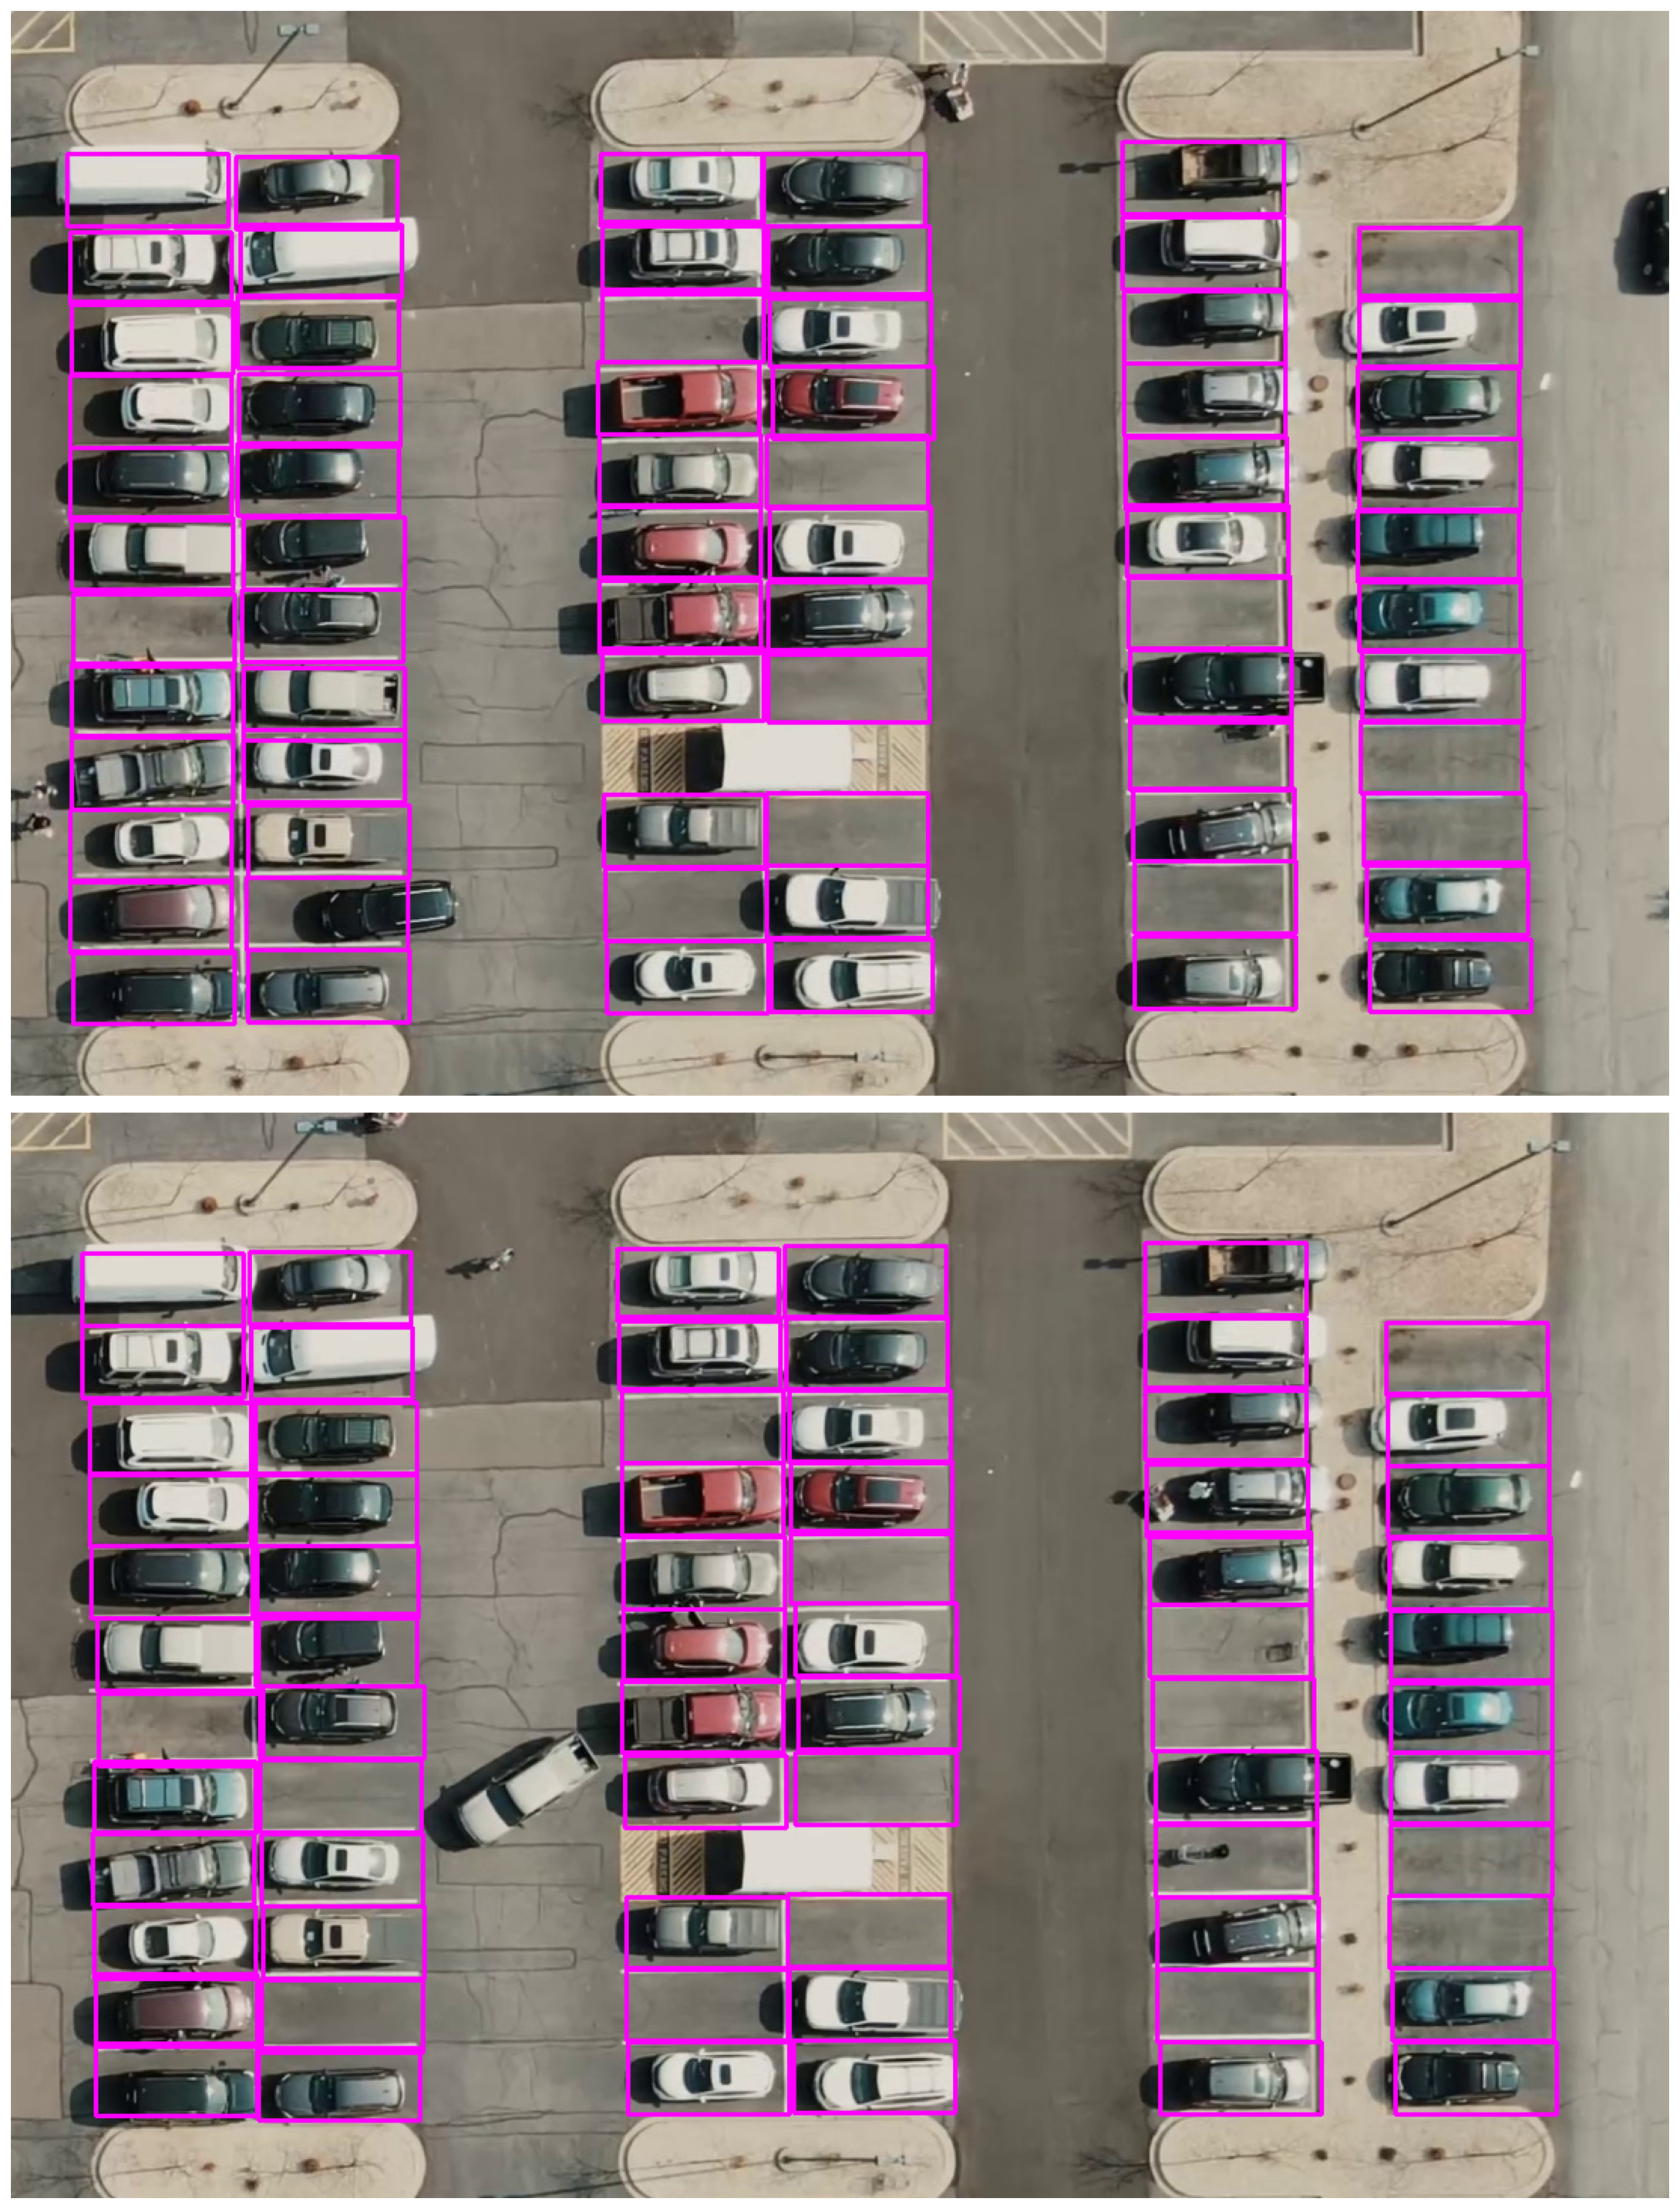

In [256]:
IMAGE_INDICESxxx = np.array([0,1])
imagesxxx = all_imagesxxx[IMAGE_INDICESxxx, 0]
show_images(imagesxxx, imagesxxx.shape[0], file_name='rec22.png')
print(f'Images shown are indices: {all_imagesxxx[IMAGE_INDICESxxx, 1]}')

In [44]:
dictend2={}
keysFinal=[]
values = -1
pos=[(11, 39), (49, 40), (50, 97), (11, 99), (11, 224), (12, 277), (52, 278), (50, 223)]

In [45]:
keysFinal=[]
count=0
for i in pos:
    temp=[]
    temp2=pos[count][0]
    temp.append(temp2)
    temp2=pos[count][1]
    temp.append(temp2)
    temp2=pos[count][0]+38
    temp.append(temp2)
    temp2=pos[count][1]+60
    temp.append(temp2)
    count=count+1
    keysFinal.append(temp)

In [46]:
keysFinal

[[11, 39, 49, 99],
 [49, 40, 87, 100],
 [50, 97, 88, 157],
 [11, 99, 49, 159],
 [11, 224, 49, 284],
 [12, 277, 50, 337],
 [52, 278, 90, 338],
 [50, 223, 88, 283]]

In [47]:
for i in keysFinal:
    temp= tuple(i)
    dictend2[temp] =-1

In [48]:
dictend2

{(11, 39, 49, 99): -1,
 (49, 40, 87, 100): -1,
 (50, 97, 88, 157): -1,
 (11, 99, 49, 159): -1,
 (11, 224, 49, 284): -1,
 (12, 277, 50, 337): -1,
 (52, 278, 90, 338): -1,
 (50, 223, 88, 283): -1}

In [14]:
dictend={(307, 218, 337, 278): -1,
 (277, 218, 307, 278): -1,
 (335, 217, 365, 277): -1,
 (362, 219, 392, 279): -1,
 (389, 218, 419, 278): -1,
 (419, 219, 449, 279): -1,
 (444, 219, 474, 279): -1,
 (470, 220, 500, 280): -1,
 (500, 221, 530, 281): -1,
 (528, 221, 558, 281): -1,
 (550, 220, 580, 280): -1,
 (577, 220, 607, 280): -1,
 (606, 220, 636, 280): -1,
 (279, 278, 309, 338): -1,
 (306, 276, 336, 336): -1,
 (335, 277, 365, 337): -1,
 (363, 280, 393, 340): -1,
 (388, 278, 418, 338): -1,
 (473, 280, 503, 340): -1,
 (500, 281, 530, 341): -1,
 (530, 278, 560, 338): -1,
 (551, 279, 581, 339): -1,
 (579, 279, 609, 339): -1,
 (606, 281, 636, 341): -1,
 (604, 44, 634, 104): -1,
 (577, 45, 607, 105): -1,
 (550, 43, 580, 103): -1,
 (523, 41, 553, 101): -1,
 (496, 42, 526, 102): -1,
 (470, 42, 500, 102): -1,
 (442, 41, 472, 101): -1,
 (416, 40, 446, 100): -1,
 (362, 43, 392, 103): -1,
 (333, 45, 363, 105): -1,
 (308, 45, 338, 105): -1,
 (281, 44, 311, 104): -1,
 (282, 103, 312, 163): -1,
 (311, 102, 341, 162): -1,
 (335, 103, 365, 163): -1,
 (360, 103, 390, 163): -1,
 (388, 103, 418, 163): -1,
 (415, 101, 445, 161): -1,
 (444, 101, 474, 161): -1,
 (473, 103, 503, 163): -1,
 (446, 281, 476, 341): -1,
 (499, 103, 529, 163): -1,
 (524, 102, 554, 162): -1,
 (552, 106, 582, 166): -1,
 (580, 103, 610, 163): -1,
 (604, 105, 634, 165): -1,
 (167, 39, 197, 99): -1,
 (138, 39, 168, 99): -1,
 (111, 40, 141, 100): -1,
 (86, 42, 116, 102): -1,
 (83, 100, 113, 160): -1,
 (386, 45, 416, 105): -1,
 (115, 100, 145, 160): -1,
 (140, 99, 170, 159): -1,
 (167, 99, 197, 159): -1,
 (114, 277, 144, 337): -1,
 (138, 279, 168, 339): -1,
 (165, 219, 195, 279): -1,
 (138, 221, 168, 281): -1,
 (113, 216, 143, 276): -1,
 (86, 220, 116, 280): -1,
 (85, 280, 115, 340): -1,
 (168, 278, 198, 338): -1,
 (2, 200,62,230): 0,
 (11, 39, 49, 99):1,
 (49, 40, 87, 100):1,
 (50, 97, 88, 157): 1,
 (11, 99, 49, 159): 1,
 (11, 224, 49, 284): 1,
 (12, 277, 50, 337): 1,
 (52, 278, 90, 338): 1,
 (50, 223, 88, 283): 1}




In [13]:
dictend

NameError: name 'dictend' is not defined

In [73]:
dictend2={(2, 200, 62, 230): 0,
 (11, 39, 49, 99): 1,
 (49, 40, 87, 100): 1,
 (50, 97, 88, 157): 1,
 (11, 99, 49, 159): 1,
 (11, 224, 49, 284): 1,
 (12, 277, 50, 337): 1,
 (52, 278, 90, 338): 1,
 (50, 223, 88, 283): 1}

In [15]:




with open('dictend.pickle', 'wb') as f_obj:
    pickle.dump(dictend, f_obj)

In [16]:
def draw_bounding_box(original_images, spot_dict_pickle_name: str):
    """Draw bounding boxes on the image to identiy how good the spot detection is.

    :param original_images: The original unadultered images.
    :param spot_dict_pickle_name: Name of the pickle file containing the coordinates
        of all identified spots.
    :return: Images with the bounding boxes drawn.
    """
    copy_images = [np.copy(img) for img in original_images]
    with open(spot_dict_pickle_name, 'rb') as f_obj:
        spot_dict = pickle.load(f_obj)
    for img in copy_images:
        for x1, y1, x2, y2 in spot_dict.keys():
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    return np.array(copy_images)


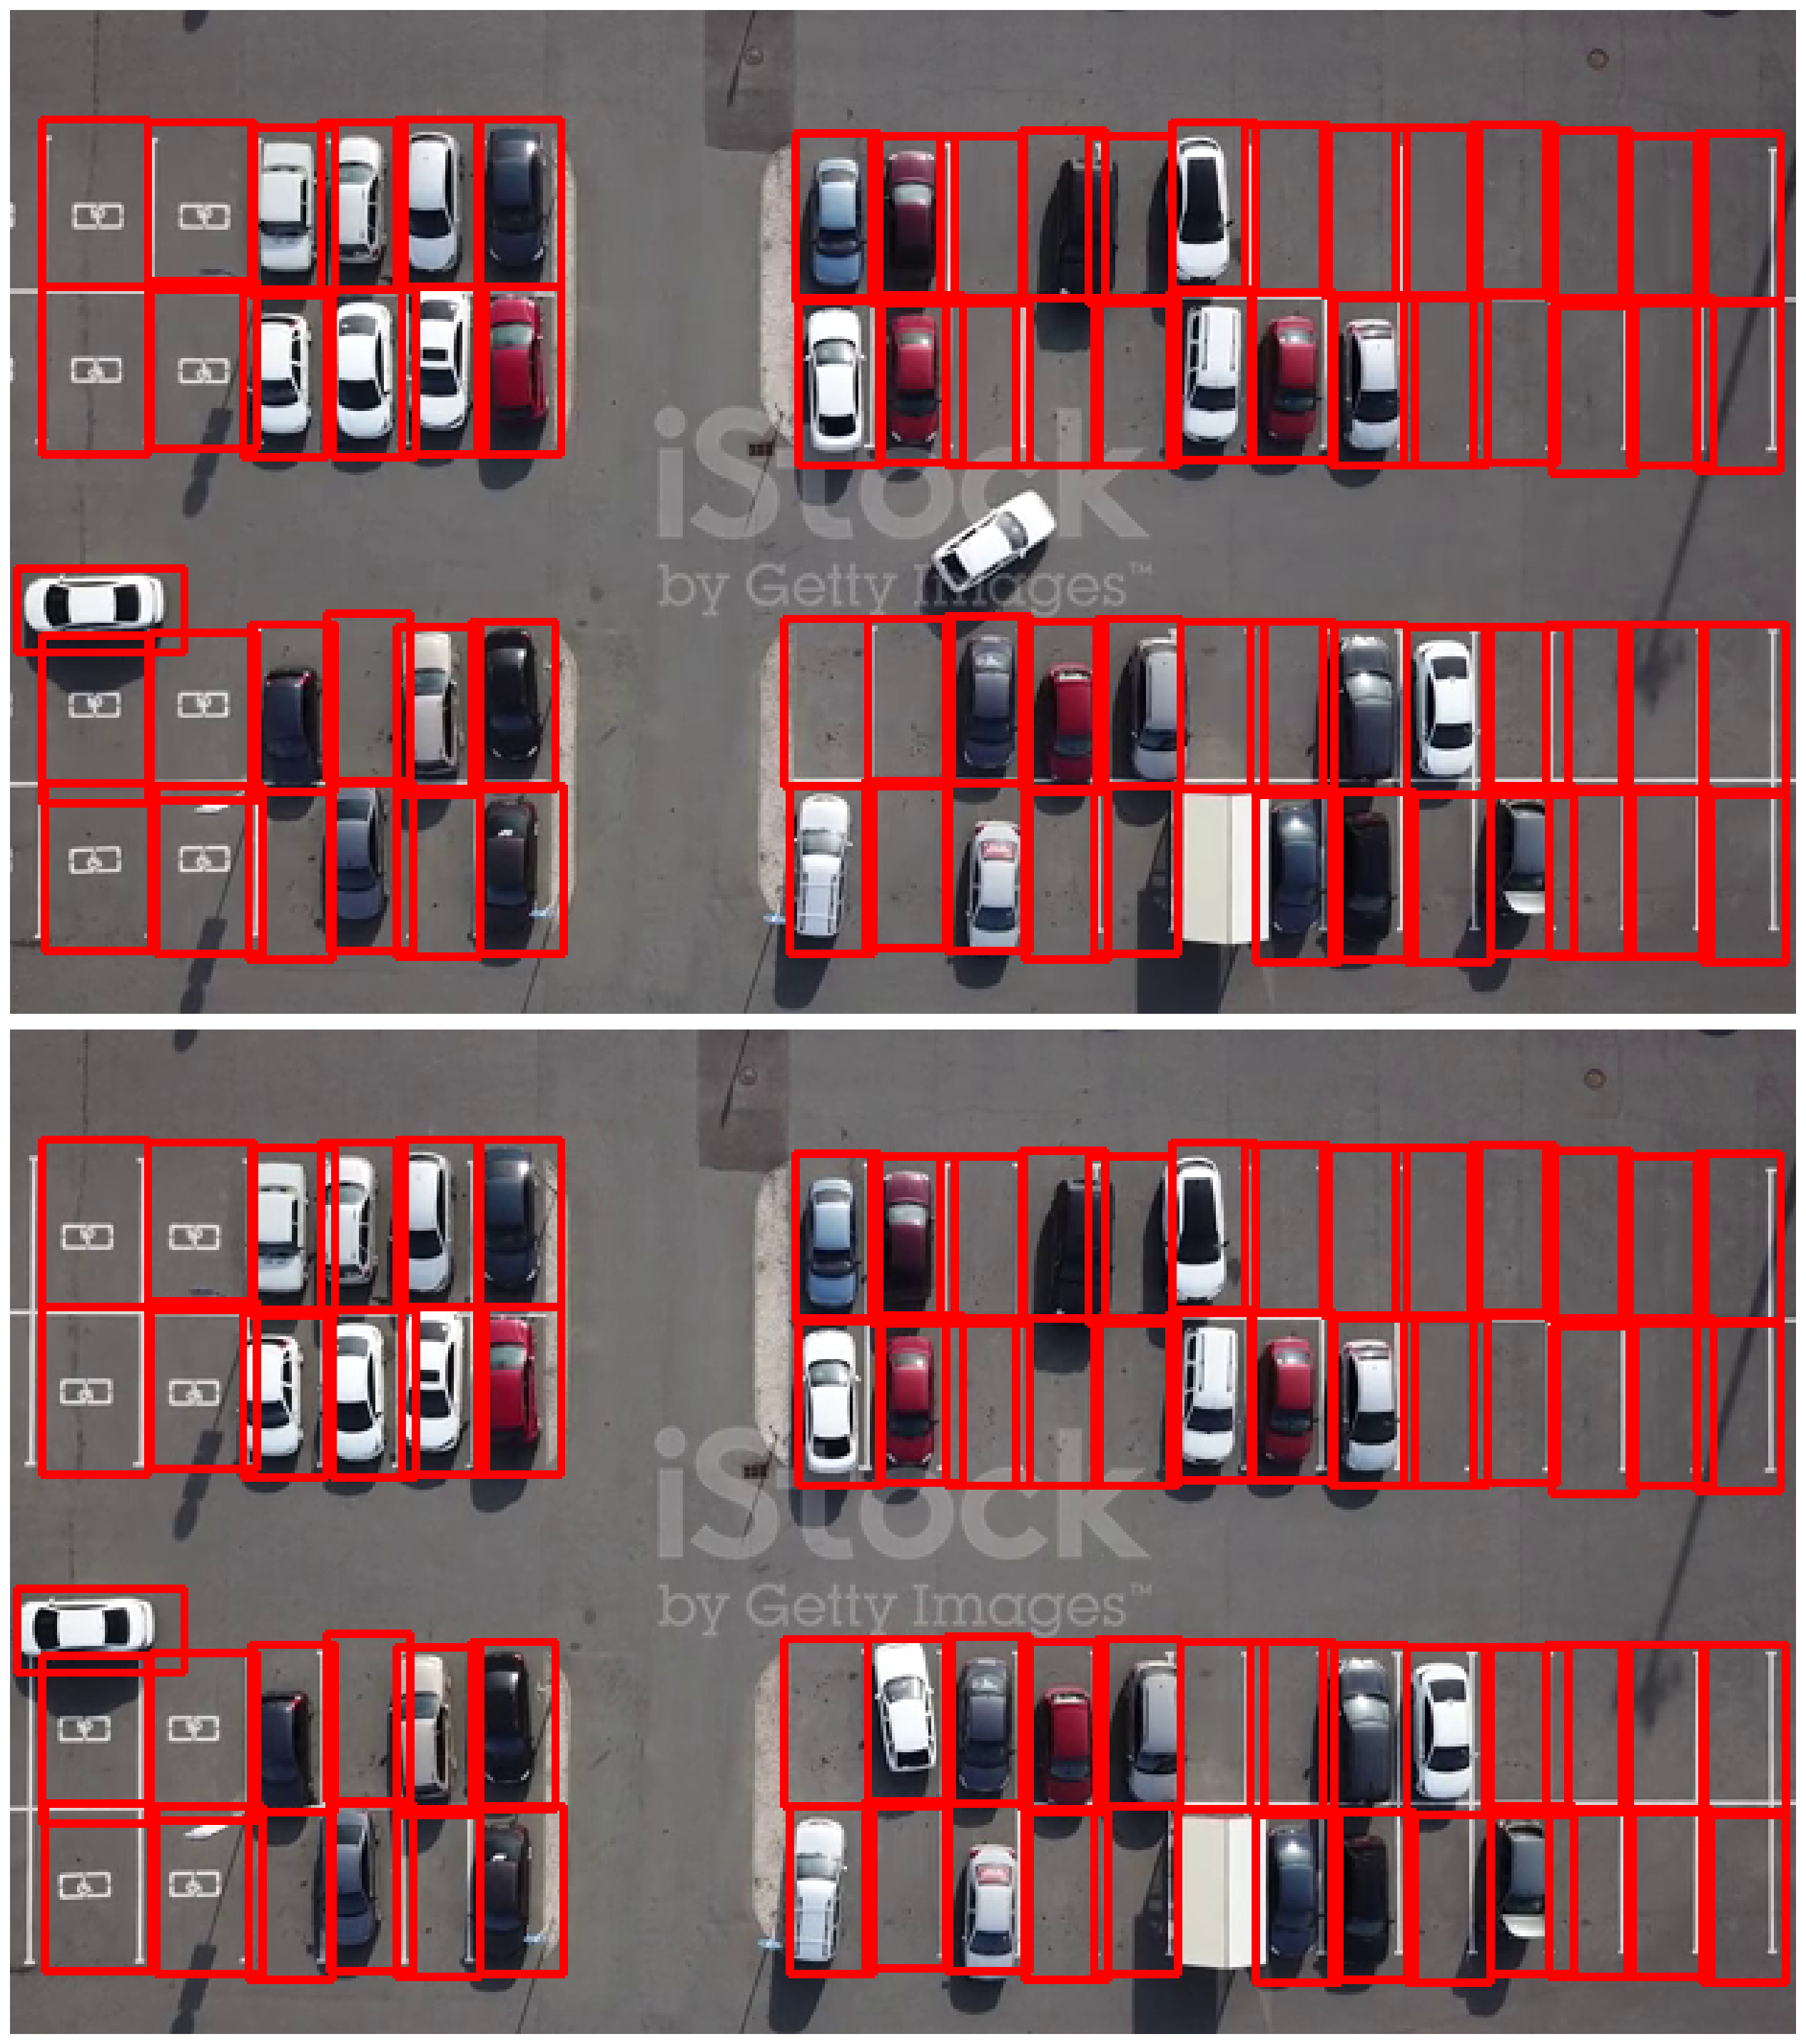

In [17]:
bounding_box_images = draw_bounding_box(all_images[[0, 5], 0], 'dictend.pickle')
show_images(bounding_box_images, bounding_box_images.shape[0], file_name='box.png')

# save_spot_images

In [18]:
def save_spot_images(original_images_ids, spot_dict_pickle_name: str, save_path: str = 'temp33') -> None:
    

    with open(spot_dict_pickle_name, 'rb') as f_obj:
        spot_dict = pickle.load(f_obj)
    for img, img_id in original_images_ids:
        for spot_id, (x1, y1, x2, y2) in enumerate(spot_dict.keys()):
            spot_img = img[y1:y2, x1:x2]
            file_name = f'f{img_id:02}_s{spot_id:03}.png'
            cv2.imwrite(f'{save_path}/{file_name}', spot_img)
            print(f'{file_name} saved!')

In [19]:
# We use the very first frame to generate training data.
save_spot_images(all_images[[0, ],:], 'dictend.pickle')

f00_s000.png saved!
f00_s001.png saved!
f00_s002.png saved!
f00_s003.png saved!
f00_s004.png saved!
f00_s005.png saved!
f00_s006.png saved!
f00_s007.png saved!
f00_s008.png saved!
f00_s009.png saved!
f00_s010.png saved!
f00_s011.png saved!
f00_s012.png saved!
f00_s013.png saved!
f00_s014.png saved!
f00_s015.png saved!
f00_s016.png saved!
f00_s017.png saved!
f00_s018.png saved!
f00_s019.png saved!
f00_s020.png saved!
f00_s021.png saved!
f00_s022.png saved!
f00_s023.png saved!
f00_s024.png saved!
f00_s025.png saved!
f00_s026.png saved!
f00_s027.png saved!
f00_s028.png saved!
f00_s029.png saved!
f00_s030.png saved!
f00_s031.png saved!
f00_s032.png saved!
f00_s033.png saved!
f00_s034.png saved!
f00_s035.png saved!
f00_s036.png saved!
f00_s037.png saved!
f00_s038.png saved!
f00_s039.png saved!
f00_s040.png saved!
f00_s041.png saved!
f00_s042.png saved!
f00_s043.png saved!
f00_s044.png saved!
f00_s045.png saved!
f00_s046.png saved!
f00_s047.png saved!
f00_s048.png saved!
f00_s049.png saved!


# Load The Model

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [21]:
# Default values
MODEL = keras.models.load_model('spot_parked_detection_model-FPLAST33')
INPUT_SHAPE = (72, 72, 3)
PRE_MODEL = keras.applications.ResNet50(include_top=False, input_shape=INPUT_SHAPE)
PRE_PROCESS = keras.applications.resnet.preprocess_input
OUTPUT_FRAMES_FOLDER = Path('outputf2g')
OUTPUT_VIDEO = Path('outt.mp4')

# predict_on_image

In [68]:
def predict_on_image(original_image, spot_dict, input_shape):
   
    all_spots = np.array(
        [cv2.resize(original_image[y1:y2, x1:x2], input_shape[:-1]) for x1, y1, x2, y2 in spot_dict.keys()],
    )
    all_pred = np.argmax(
        MODEL.predict(PRE_MODEL.predict(PRE_PROCESS(all_spots))),
        axis=1,
    )
    return all_pred


def draw_prediction(original_image, spot_dict, all_pred, alpha):
  
    
    new_image = np.copy(original_image)
    overlay = np.copy(original_image)
    # get the counts of all classes
    counts = dict(zip(*np.unique(all_pred, return_counts=True)))
    for pred, (x1, y1, x2, y2) in zip(all_pred, spot_dict.keys()):
        if pred == 0:  # green for empty space
            cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 100, 255), 2)
        elif pred == 1:  # blue for obstacle space
            cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 255, 0), 2)
        elif pred == 2:  # yellow for obstacle space
            cv2.rectangle(overlay, (x1, y1), (x2, y2), (255, 0, 0), 2)
        elif pred == 3:  # red for obstacle space
            cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 0, 255), 2)
        elif pred == 4:  # red for obstacle space
            cv2.rectangle(overlay, (x1, y1), (x2, y2), (0, 255, 255), 2)
    cv2.addWeighted(overlay, alpha, new_image, 1 - alpha, 0, new_image)
    cv2.putText(
        new_image,
        f'Available Parking: {counts[1]} spots',
        (10, 20),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 0, 0),
        1,
    )
    cv2.putText(
        new_image,
        f'Disabled Parking: {counts[4]} spots',
        (400, 20),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 0, 0),
        1,
    )
#     cv2.putText(
#         new_image,
#         f'All Parking: {counts[0]+counts[1]+counts[3]+counts[4]} spots',
#         (10, 20),
#         cv2.FONT_HERSHEY_SIMPLEX,
#         0.5,
#         (0, 0, 0),
#         1,
#     )
    cv2.putText(
        new_image,
        f'One in Two Parking: {counts[0]-1} cars',
        (400, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 0, 0),
        1,
    )
    cv2.putText(
        new_image,
        f'Parked in Wrong Space: {counts[3]} cars',
        (10, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5,
        (0, 0, 0),
        1,
    )
    
    return new_image

In [69]:
def predict_and_mark_empty_spot(
    original_images,
    spot_dict_pickle_name,
    input_shape=INPUT_SHAPE,
    alpha=0.3,
):
   
    with open('dictend.pickle', 'rb') as f_obj:
        spot_dict = pickle.load(f_obj)
    all_preds = np.array([
        predict_on_image(img, spot_dict, input_shape=input_shape) for img in original_images
    ])
    return np.array([
        draw_prediction(img, spot_dict, pred, alpha=alpha) for img, pred in zip(original_images, all_preds)
    ])


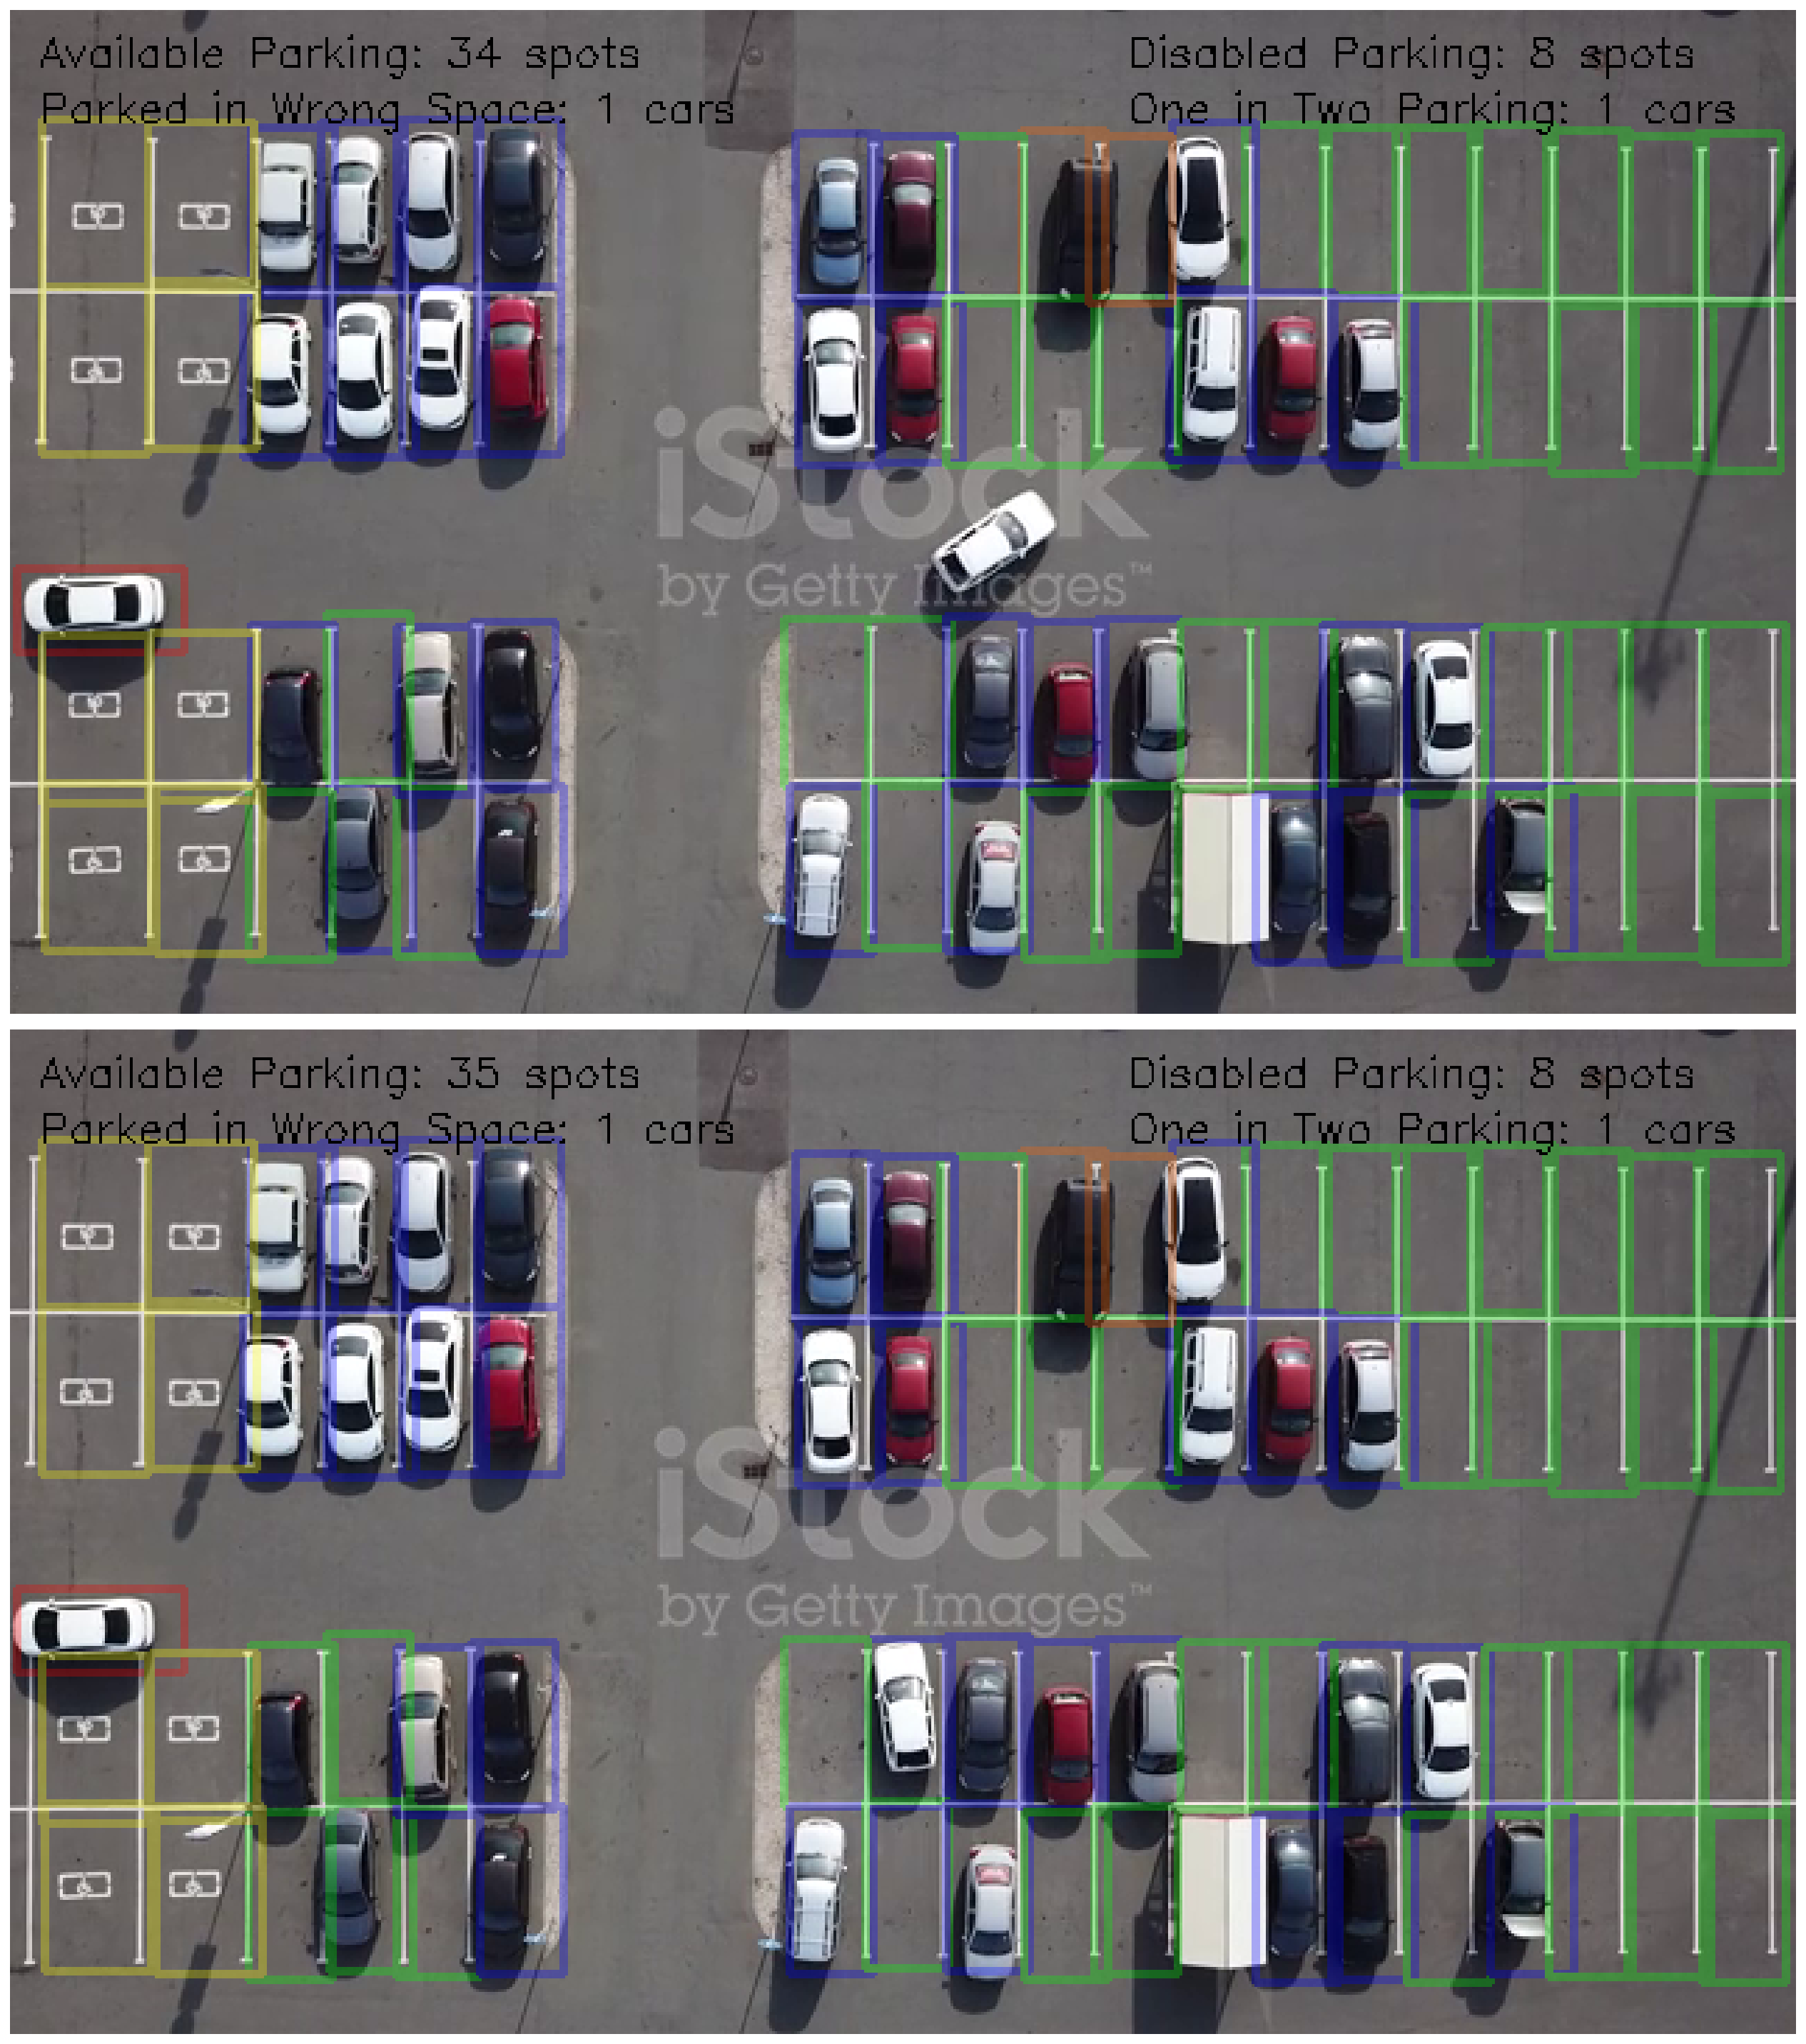

In [70]:
predicted_images = predict_and_mark_empty_spot(all_images[[0, 5], 0],  'dictend.pickle')
show_images(predicted_images, predicted_images.shape[0], file_name='empty_spot_predicted.png')

# predicted_video

In [77]:
OUTPUT_FRAMES_FOLDER = Path('outputV')
#VIDEO_PATH = Path('download.mp4')

In [78]:
OUTPUT_VIDEO = Path('outt.mp4')

In [79]:
def get_predicted_video_frames(
    pred_frequency: int,
    input_video_path: Path,
    output_frames_folder: Path,
    spot_dict_pickle_name: str,
    max_frame_count: int = 1000,
):
    """Get raw frames from the original video, draw a new frame after making empty spot prediction.

    After the new frame is drawn, it is saved as a PNG file.

    :param pred_frequency: The frequency of making predictions and drawing a new frame. For
        instance, if `pred_frequency` is 5, that means we make preidiction and draw a new frame
        every 5 frames.
    :param input_video_path: A Path object containing the path to the original video.
    :param output_frames_folder: A Path obejct containing the path to the destination of the
        new frame images.
    :param spot_dict_pickle_name: Name of the pickle file for `spot_dict`.
    :param max_fram_count: Maximum number of frames to capture from the original video. Default
        to 1000. For a simple demo purpose, there is no need to grab all the frames in the original
        video.
    """
    cap = cv2.VideoCapture(str(input_video_path))
    ret, frame_count, predicted_count = True, 0, 0

    while ret and predicted_count < max_frame_count:
        ret, frame = cap.read()
        frame_count += 1
        if frame_count % pred_frequency == 0:
            new_images = predict_and_mark_empty_spot(np.array([frame]), spot_dict_pickle_name)
            file_name = f'{output_frames_folder}/{frame_count:04}.png'
            cv2.imwrite(file_name, new_images[0])
            predicted_count += 1
            print(file_name)
    cap.release()


def create_predicted_video(
    output_frames_folder: Path,
    output_video_path: Path,
    video_length: int,
    fps: int,
):
    """Create a video by combining the newly drawn frames together.

    :param output_frames_folder: A Path obejct containing the path to the destination of the
        new frame images.
    :param output_video_path: A Path object containing the path to the destination of the
        new video.
    :param video_length: The duration of the video, in seconds.
    :param fps: Frame per second. Video appears more speeded up if a higher FPS is given.
    """
    # must sort the paths because .glob does not guarantee order
    all_frame_paths = sorted(OUTPUT_FRAMES_FOLDER.glob('*.png'))
    all_frames = [cv2.imread(str(frame_path)) for frame_path in all_frame_paths[:video_length * fps]]
    h, w, channels = all_frames[0].shape
    size = (w, h)
    out = cv2.VideoWriter(
        str(output_video_path),
        cv2.VideoWriter_fourcc(*'mp4v'),
        fps,
        size,
    )
    for i, frame in enumerate(all_frames[:]):
        out.write(frame)
        print(f'Frame {i:04} written.')
    out.release()

In [80]:
# Get all the predicted frames
get_predicted_video_frames(1, VIDEO_PATH, OUTPUT_FRAMES_FOLDER, 'dictend.pickle', max_frame_count=500)
print('Frame prediction DONE!')

outputV/0001.png
outputV/0002.png


KeyboardInterrupt: 

In [81]:
# Stich the predicted frames into a new video
create_predicted_video(OUTPUT_FRAMES_FOLDER, OUTPUT_VIDEO, video_length=30, fps=12)
print('Video CREATED!')

Frame 0000 written.
Frame 0001 written.
Frame 0002 written.
Frame 0003 written.
Frame 0004 written.
Frame 0005 written.
Frame 0006 written.
Frame 0007 written.
Frame 0008 written.
Frame 0009 written.
Frame 0010 written.
Frame 0011 written.
Frame 0012 written.
Frame 0013 written.
Frame 0014 written.
Frame 0015 written.
Frame 0016 written.
Frame 0017 written.
Frame 0018 written.
Frame 0019 written.
Frame 0020 written.
Frame 0021 written.
Frame 0022 written.
Frame 0023 written.
Frame 0024 written.
Frame 0025 written.
Frame 0026 written.
Frame 0027 written.
Frame 0028 written.
Frame 0029 written.
Frame 0030 written.
Frame 0031 written.
Frame 0032 written.
Frame 0033 written.
Frame 0034 written.
Frame 0035 written.
Frame 0036 written.
Frame 0037 written.
Frame 0038 written.
Frame 0039 written.
Frame 0040 written.
Frame 0041 written.
Frame 0042 written.
Frame 0043 written.
Frame 0044 written.
Frame 0045 written.
Frame 0046 written.
Frame 0047 written.
Frame 0048 written.
Frame 0049 written.
